# Lucy in the sky with diamonds 

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



## Some info:

**Carat**: Diamond **carat** weight measures how much a diamond weighs. All else being equal, diamond price increases with diamond **carat** weight because larger diamonds are rarer and more desirable. However, two diamonds of equal carat weight can have very different values (and prices) depending on three other factors of the diamond 4Cs: **Color**, **Clarity**, and **Cut**.
   
 **Color**: D-to-Z diamond color-grading system measures the degree of colorlessness by comparing a stone. 
   
 **Cut**: Diamond’s cut grade is really about how well a diamond’s facets interact with light.
 
 **Clarity**: 
     + Flawless (FL) No inclusions and no blemishes visible under 10x magnification
     + Internally Flawless (IF) No inclusions visible under 10x magnification
     + Very, Very Slightly Included (VVS1 and VVS2) Inclusions so slight they are difficult for a skilled grader to see under 10x magnification
     + Very Slightly Included (VS1 and VS2) Inclusions are observed with effort under 10x magnification, but can be characterized as minor
     + Slightly Included (SI1 and SI2) Inclusions are noticeable under 10x magnification
     + Included (I1, I2, and I3) Inclusions are obvious under 10x magnification which may affect transparency and brilliance
     
**x**: length in mm

**y**: width in mm

**z**: depth in mm

**depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table**: width of top of diamond relative to widest point (43--95)

*https://4cs.gia.edu/en-us/4cs-diamond-quality/*

## Explore the data

In [2]:
train = pd.read_csv('../INPUT/diamonds_train.csv') 
test = pd.read_csv('../INPUT/diamonds_test.csv')

In [3]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [4]:
print(train.shape)
train.dtypes

(40345, 11)


Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [5]:
train.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345,40345,40345,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,16090,8499,9751,NaN,NaN,NaN,NaN,NaN,NaN
mean,20172.000000,0.795652,NaN,NaN,NaN,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,11646.742642,0.470806,NaN,NaN,NaN,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,10086.000000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,20172.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,30258.000000,1.040000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000


In [6]:
train.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [3]:
train.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

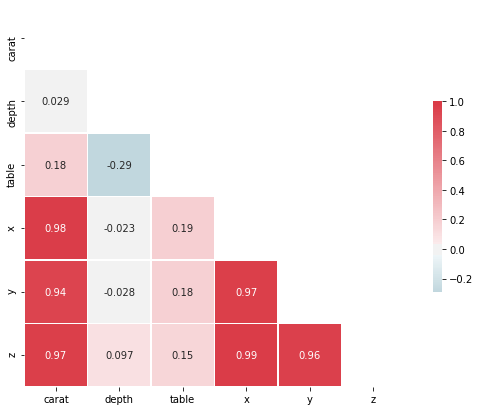

In [8]:
#Create the correlation matrix
correlation_matrix = train.drop(columns=['Unnamed: 0', 'price'], axis=1).corr()
#A mask to hide repeated data on top of the diagonal
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Draw the heatmap:
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

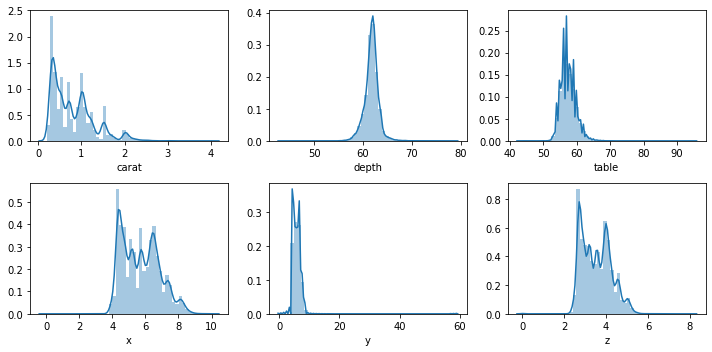

In [9]:
f, ax = plt.subplots(2,3, figsize=(10,5))
for i, e in enumerate(train.drop(columns=['Unnamed: 0','cut', 'color', 'clarity', 'price'], axis=1)):
    sns.distplot(train[e], ax = ax[(0 if i<3 else 1),(i if i<3 else i-3)])
plt.tight_layout()

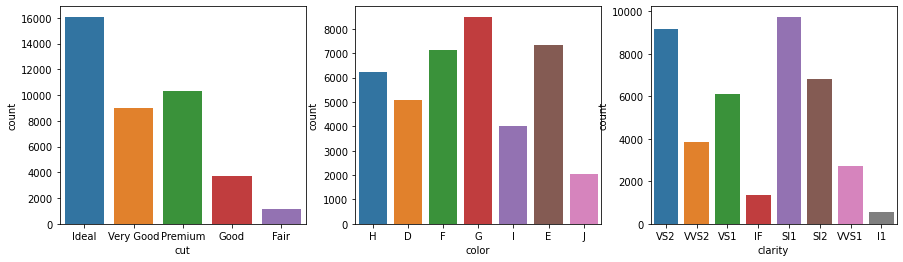

In [10]:
f, ax = plt.subplots(1,3, figsize = (15,4))
sns.countplot(train['cut'], ax = ax[0])
sns.countplot(train['color'], ax = ax[1])
sns.countplot(train['clarity'], ax = ax[2])

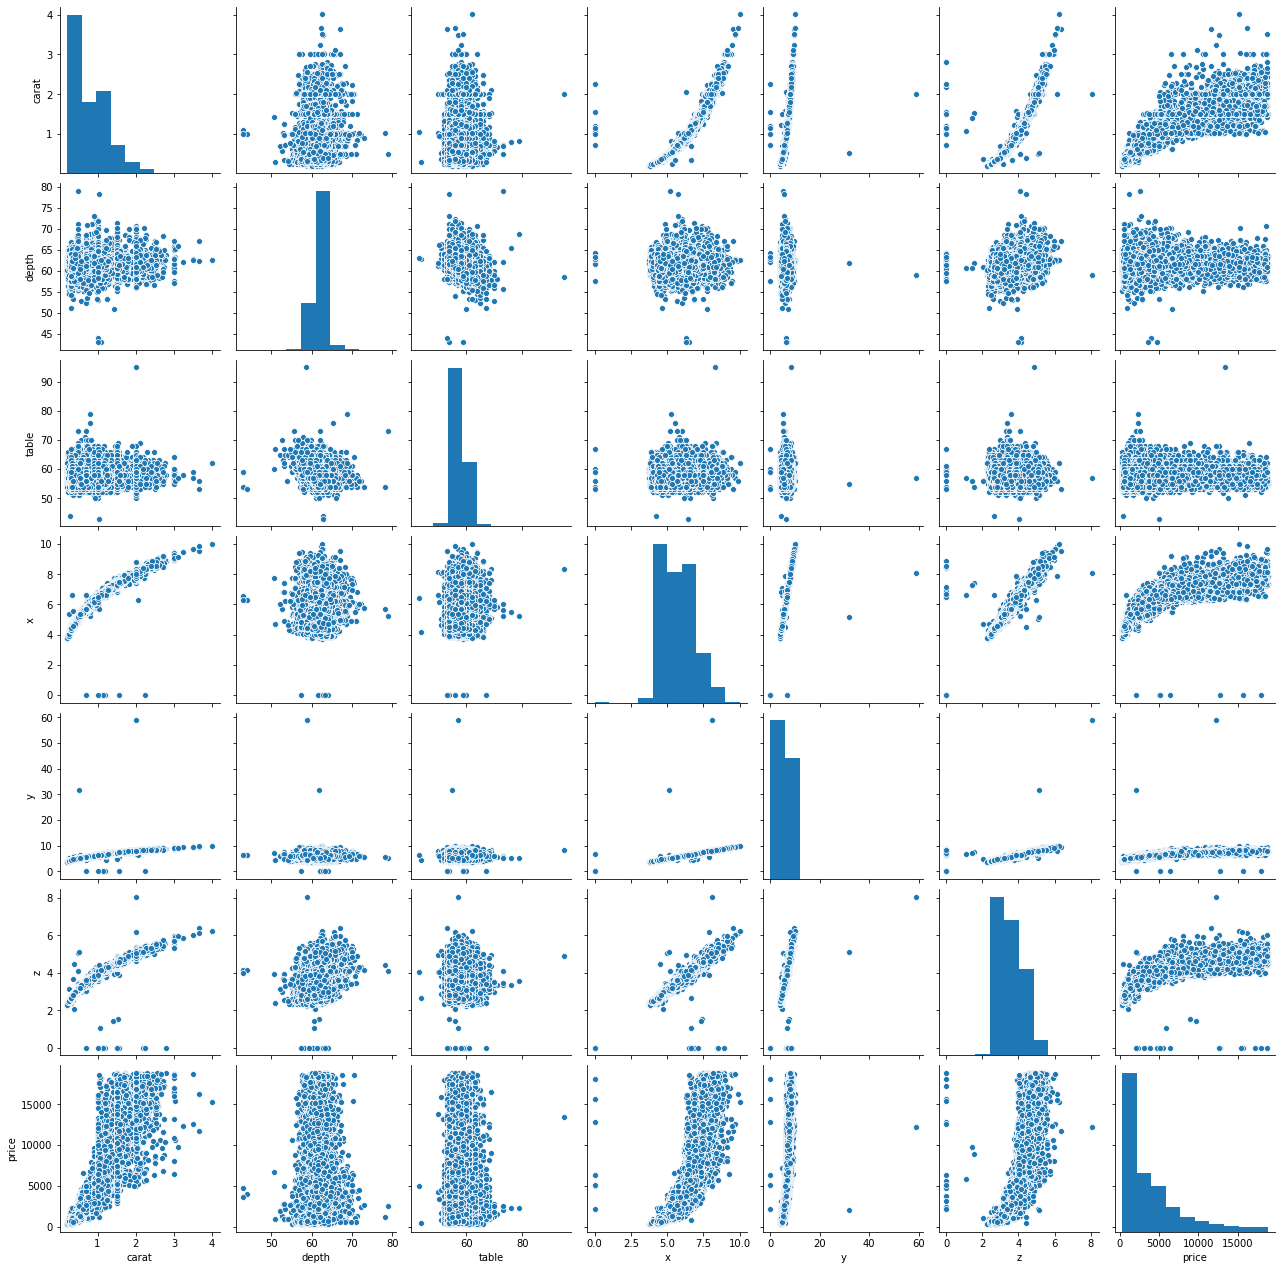

In [18]:
sns.pairplot(train.drop(columns=['Unnamed: 0','cut', 'color', 'clarity']))

Some of the relationships seem to be logarithmical:

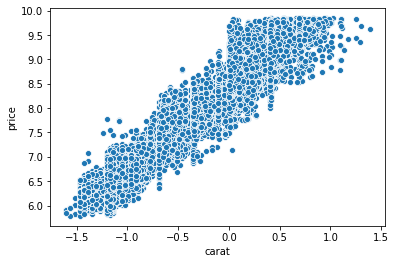

In [10]:
log_x = train['carat'].apply(lambda x: np.log(x))
log_y = train['price'].apply(lambda x: np.log(x))
sns.scatterplot(log_x, log_y,  data=train)